In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
seaborn.set(style='ticks')

## Problem 1

### a) Visualize the feasible set $\mathcal{X}$

In [47]:
def plot_constraints(show_feasible=False, ax=None):
    if ax is None:
        ax = plt
        
    # Box constraints
    ax.axvline(x=3, alpha=0.5)
    ax.axvline(x=0, alpha=0.5)
    ax.axhline(y=2.5, alpha=0.5)
    ax.axhline(y=0, alpha=0.5)

    # Diagonal constraint
    x = np.linspace(-1,5,2)
    y = 4 - x
    ax.plot(x, y, alpha=0.5)

    # Feasible region
    if show_feasible:
        x = np.linspace(1.5, 3, 2)
        y = 4 - x
        ax.plot(x, y, c='r')
        ax.axvline(x=3, ymin=0.17, ymax=0.33, c='r')
        ax.axvline(x=0, ymin=0.17, ymax=0.58, c='r')

        ax.axhline(y=0, xmin=0.17, xmax=0.66, c='r')
        ax.axhline(y=2.5, xmin=0.17, xmax=0.42, c='r')

    if ax is plt:
        ax = ax.gca()
    # ax.plot(x, 1/x)
    # ax.plot(x, np.log(x))
    ax.set_aspect('equal')
    ax.grid(True, which='both')
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    seaborn.despine(ax=ax, offset=0) # the important part here

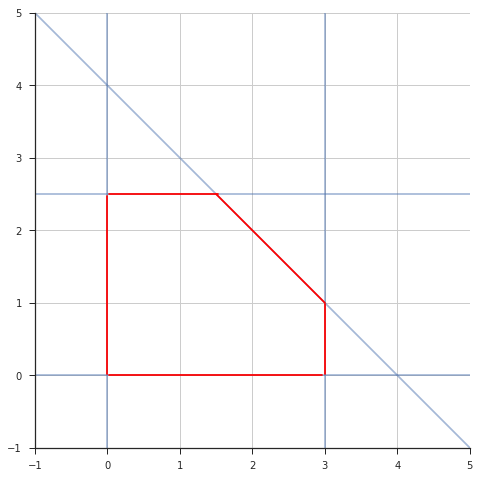

In [48]:
fig = plt.figure(figsize=[8, 8])
plot_constraints(show_feasible=True)

### Derive the projection operator $\pi_{\mathcal{X}}(p)$

In [71]:
def project(x1, x2):
    """Project a point with coordinates (x1, x2) onto the set X"""
    # Point is inside the region X, do nothing
    if (x1 + x2 <= 4) and (0 <= x1 <= 3) and (0 <= x2 <= 2.5):
        x1_new, x2_new = x1, x2
        
    # Linear inequality constraint is active
    elif (x1 >= 1.5) and (x2 >= 1):
        # Corner point #1
        if -x1 + x2 >= 1:
            x1_new, x2_new = 1.5, 2.5
        # Corner point #2
        elif -x1 + x2 <= -2:
            x1_new, x2_new = 3, 1
        # Projection onto a line
        else:
            x1_new = 2 + 0.5 * x1 - 0.5 * x2
            x2_new = 2 - 0.5 * x1 + 0.5 * x2
            
    # Box constraints are active
    else:
        x1_new = max(0, min(x1, 3)) 
        x2_new = max(0, min(x2, 2.5)) 
        
    return (x1_new, x2_new)

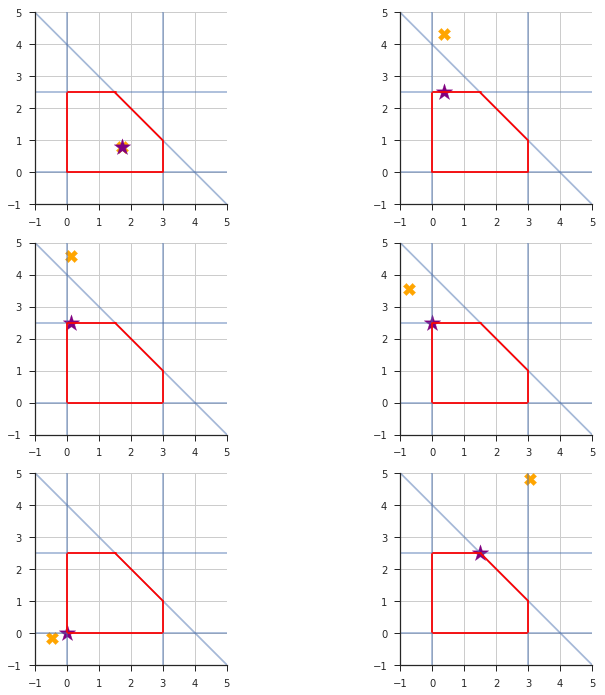

In [60]:
np.random.seed(117)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[12, 12])
for ax in axes.ravel():
    plot_constraints(show_feasible=True, ax=ax)
    p1 = np.random.uniform(low=-1, high=5)
    p2 = np.random.uniform(low=-1, high=5)
    ax.scatter(p1, p2, marker='X', s=150, c='orange')
    p1_new, p2_new = project(p1, p2)
    ax.scatter(p1_new, p2_new, marker='*', s=300, c='purple')

### Perform PGD

In [7]:
def grad(x1, x2):
    return (2 * x1 - 4, 8 * x2 - 28)

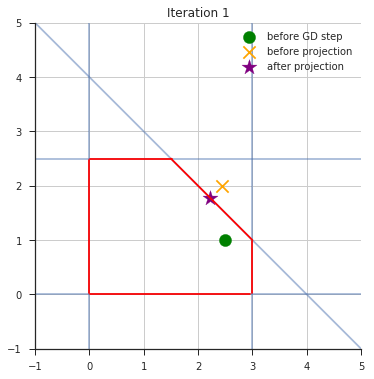

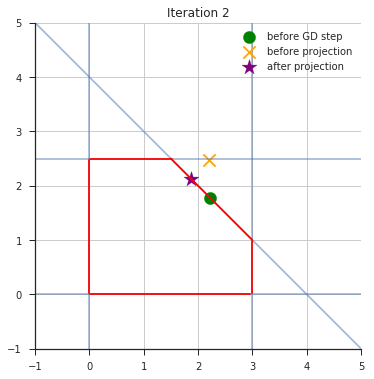

In [70]:
tau = 0.05
x1, x2 = (2.5, 1)
for i in range(1, 3):
    plt.figure(figsize=[6, 6])
    plt.title(f'Iteration {i}')
    plot_constraints(show_feasible=True)
    plt.scatter(x1, x2, marker='o', s=150, c='green', label='before GD step')
    
    dx1, dx2 = grad(x1, x2)
    x1 = x1 - tau * dx1
    x2 = x2 - tau * dx2
    # Visualize the results
    plt.scatter(x1, x2, marker='x', s=150, c='orange', label='before projection')
    
    # Project to the feasible region
    x1, x2 = project(x1, x2)
    plt.scatter(x1, x2, marker='*', s=250, c='purple', label='after projection')
    plt.legend()